# Import Data and Packages

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# ingore future warning
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)
# surprass chain warning
pd.set_option('mode.chained_assignment', None)
#warnings.filterwarnings("ignore", message=r"Passing", category=SettingWithCopyWarning)
print("set the printing size of the pandas df...")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# read in csv 
df = pd.read_csv('../Data/df_group_2024_03_22.csv')
# shape 
print("shape: ", df.shape)

print("also save df as df_save")
df_save = df

print("create herd_cow id")
df['herd_cow'] = df['anm_ida']*1000 + df['hrd_ida']

set the printing size of the pandas df...
shape:  (1111511, 25)
also save df as df_save
create herd_cow id


In [23]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Descriptive Statistics

### Datatype

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111511 entries, 0 to 1111510
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   anm_ida_milkng_date  1111511 non-null  object 
 1   mk_wgt               1111511 non-null  float64
 2   anb_cd               1111511 non-null  object 
 3   milkng_code          1111511 non-null  float64
 4   dim                  1111511 non-null  float64
 5   min_time             1111469 non-null  float64
 6   var_time             1111469 non-null  float64
 7   milk_flow_max        1111469 non-null  float64
 8   scc                  706578 non-null   float64
 9   ft_pcnt              1111511 non-null  float64
 10  pt_pcnt              1111511 non-null  float64
 11  milkng_temp          1111394 non-null  float64
 12  anm_ida              1111511 non-null  int64  
 13  hrd_ida              1111511 non-null  int64  
 14  prep_time            1111469 non-null  float64
 15

### Mean, max, quantiles

In [6]:
df.iloc[:, :13].describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida
count,3210956.000,3210956.000,3210956.000,3210392.000,3210392.000,3210392.000,951015.000,3210956.000,3210956.000,3205272.000,3210956.000
mean,12.520,0.020,157.474,2.472,1.123,4.397,273.770,4.003,3.253,38.514,3996.442
std,4.151,0.142,115.822,1.392,2.278,1.444,537.265,1.055,0.533,2.799,2304.099
min,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,10.000,0.000,68.000,1.683,0.162,3.400,39.000,3.495,3.151,38.300,1993.000
50%,12.000,0.000,141.000,2.350,0.432,4.300,76.000,4.039,3.307,38.700,3977.000
75%,14.700,0.000,227.000,3.167,1.132,5.300,199.000,4.583,3.462,39.100,5986.000
max,54.400,1.000,1393.000,15.983,96.177,12.700,10552.000,14.340,6.578,58.600,8013.000


In [37]:
df.iloc[:, 13:23].describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity
count,1111511.000,1111469.000,1111511.000,1111511.000,1111469.000,1111469.000,1111469.000,1111469.000,1111511.000,1111511.000
mean,26.024,2.620,102.342,7.077,3.848,3.172,3.170,3.810,2.038,2.072
std,15.694,0.664,1.765,1.976,1.811,1.530,1.515,1.809,0.833,0.853
min,0.000,-1.808,101.000,0.083,0.000,0.000,0.000,0.000,1.000,1.000
25%,11.000,2.253,101.000,5.708,2.661,2.183,2.192,2.639,1.000,1.000
50%,26.000,2.506,102.000,6.667,3.539,2.917,2.917,3.494,2.000,2.000
75%,42.000,2.817,103.000,7.983,4.706,3.875,3.892,4.633,3.000,3.000
max,50.000,53.500,112.000,56.792,20.425,20.000,20.000,20.900,3.000,3.000


In [38]:
df.iloc[:, 23:].describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,no_visit,lact_no
count,1111511.000,1111511.000
mean,2.889,2.485
std,0.917,1.540
min,1.000,1.000
25%,2.000,1.000
50%,3.000,2.000
75%,3.000,3.000
max,45.000,11.000


### Histogram

In [52]:
print("plot histogram with best fit distribution")
ls_plot = [ 'mk_wgt', 'min_time', 'var_time', 'milk_flow_max', 'scc', 'ft_pcnt', 'pt_pcnt', 'milkng_temp',  'prep_time',  'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time',  'no_visit']
# shrink columns 
df_plot = df[ls_plot]
# replace columns 
df_plot.columns = [ 'mk_wgt: beta', 'min_time: t', 'var_time: beta', 'milk_flow_max: alpha', 'scc: t', 'ft_pcnt: t', 'pt_pcnt: t', 'milkng_temp: t',  'prep_time: alpha',  'box_time: alpha', 'lr_milk_time: alpha', 'lf_milk_time: alpha', 'rf_milk_time: alpha', 'rr_milk_time: t',  'no_visit: beta']


plot histogram with best fit distribution


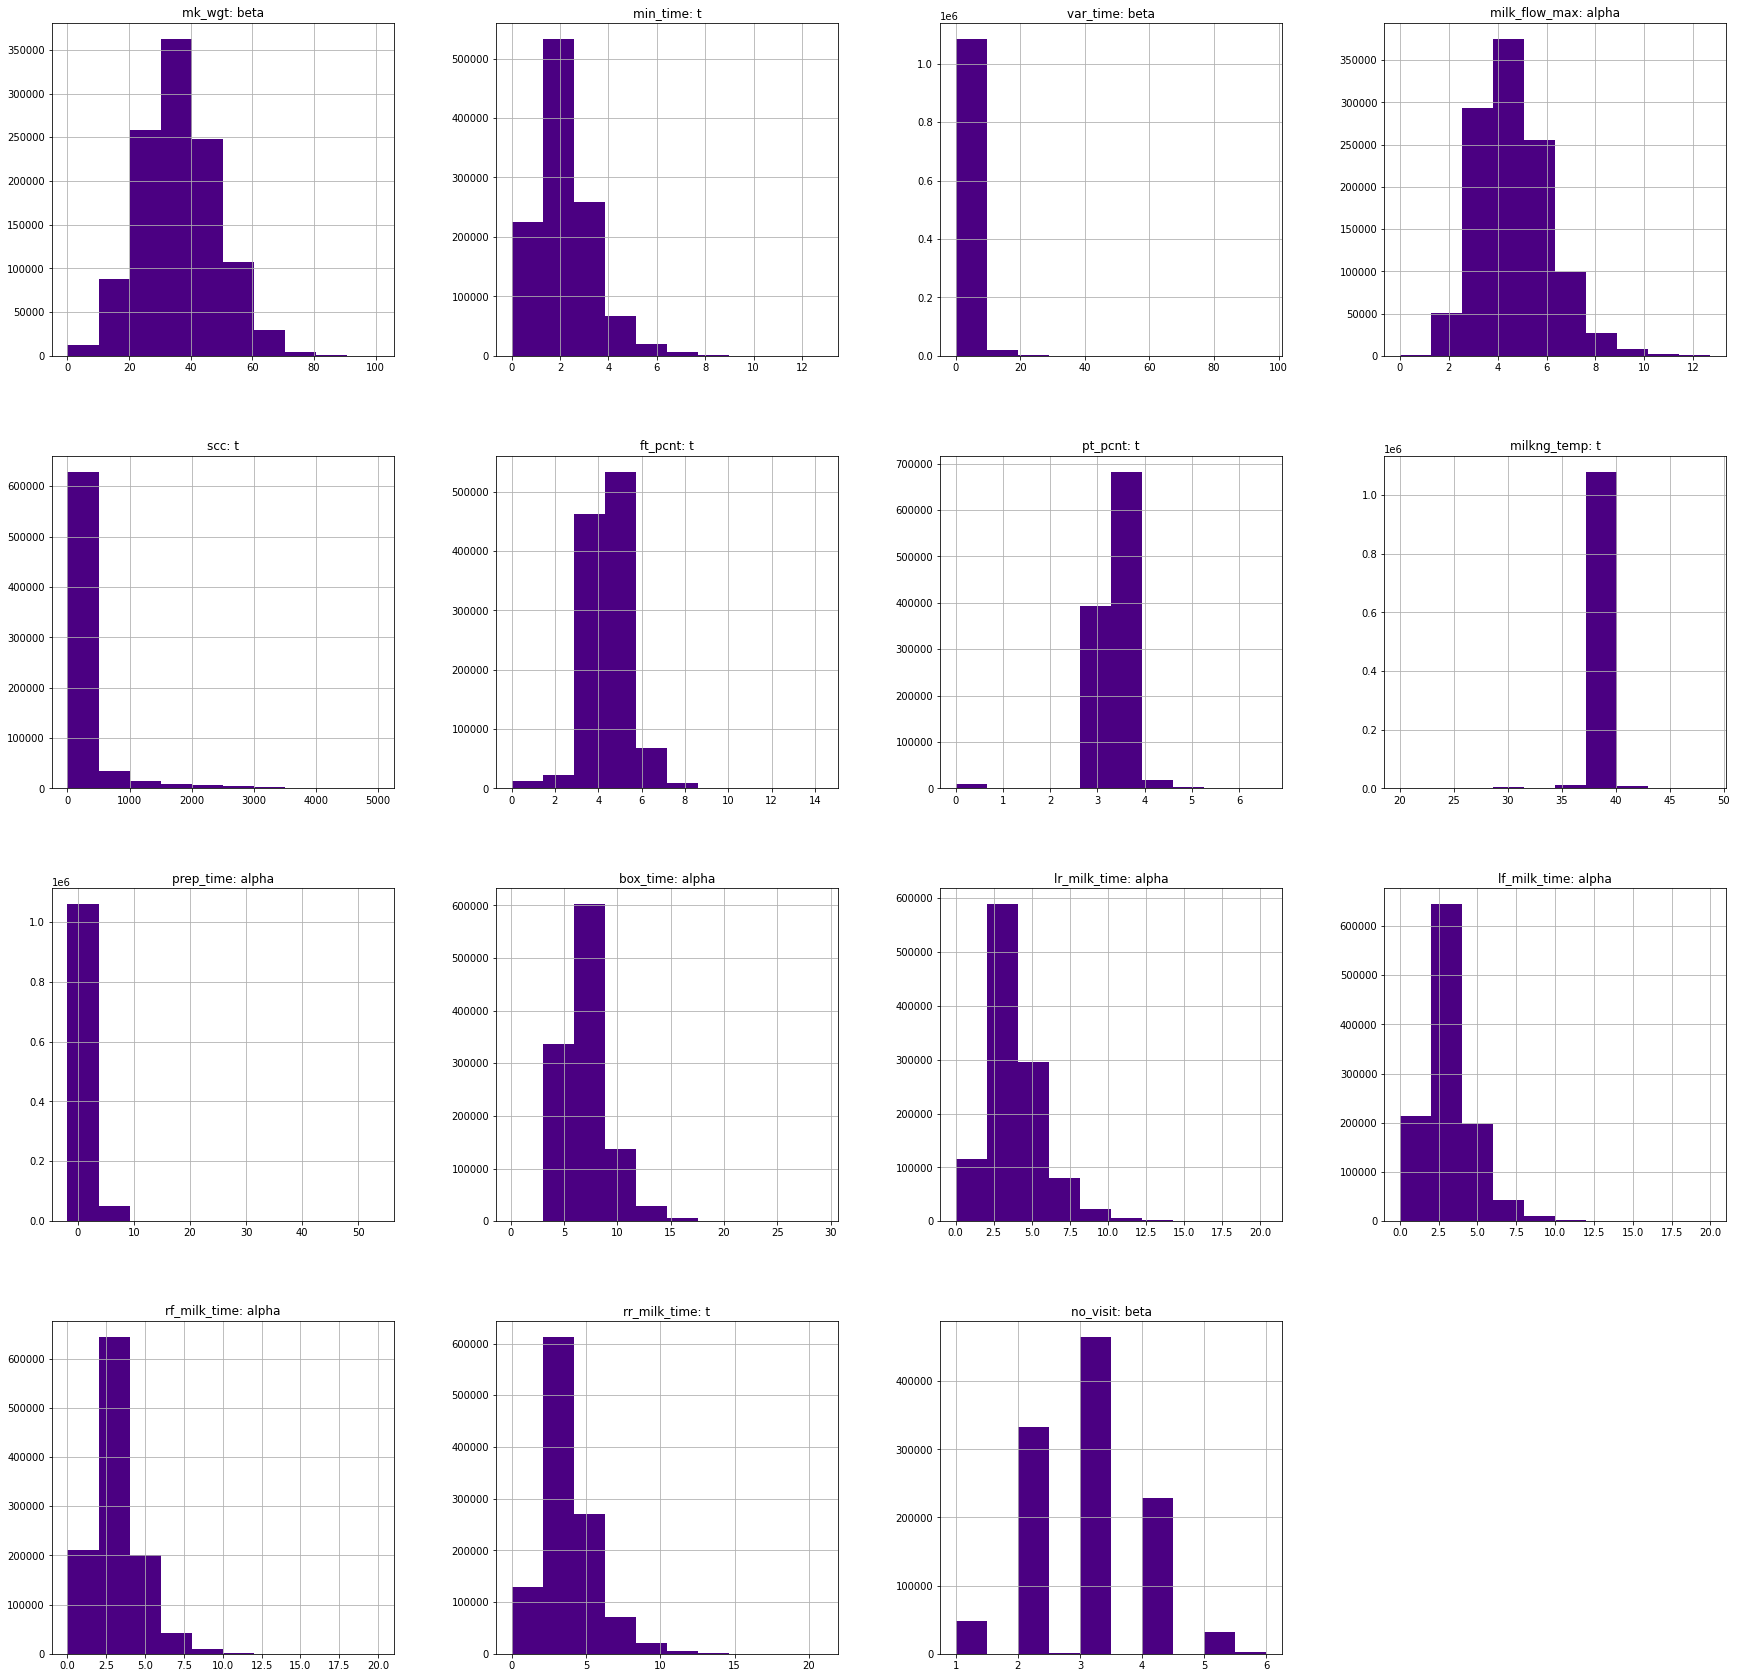

In [54]:
hist = df_plot.hist(figsize=(30, 30), color="indigo")

In [6]:
df_check = df[df['prep_time']<=0]
print("number of negative df_check: ", df_check.shape[0])
print("either box_time or quarter milk time is wrong")
df_check

number of negative df_check:  3
either box_time or quarter milk time is wrong


,herd_cow_date,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no
756205,5922030-20221217,21.6,HO,0.0,1072.0,0.000000,7.317847,2.8,216.0,4.475728,3.646311,38.0,5922,30,-0.100000,102.0,5.955556,6.055556,3.916667,0.000000,4.311111,3.0,1.0,3,1.0
879264,6707027-20220303,42.7,HO,0.0,142.0,5.333333,7.390463,3.4,NaN,4.077670,3.287087,38.2,6707,27,-1.808333,101.0,8.783333,9.258333,5.541667,6.575000,10.483333,2.0,3.0,2,3.0
1069111,7948027-20220303,41.5,HO,0.0,138.0,3.483333,1.953056,4.4,NaN,4.485437,3.442427,38.5,7948,27,-0.700000,102.0,6.091667,6.258333,5.308333,4.533333,5.875000,2.0,2.0,2,2.0


### Box plot (Quantiles)

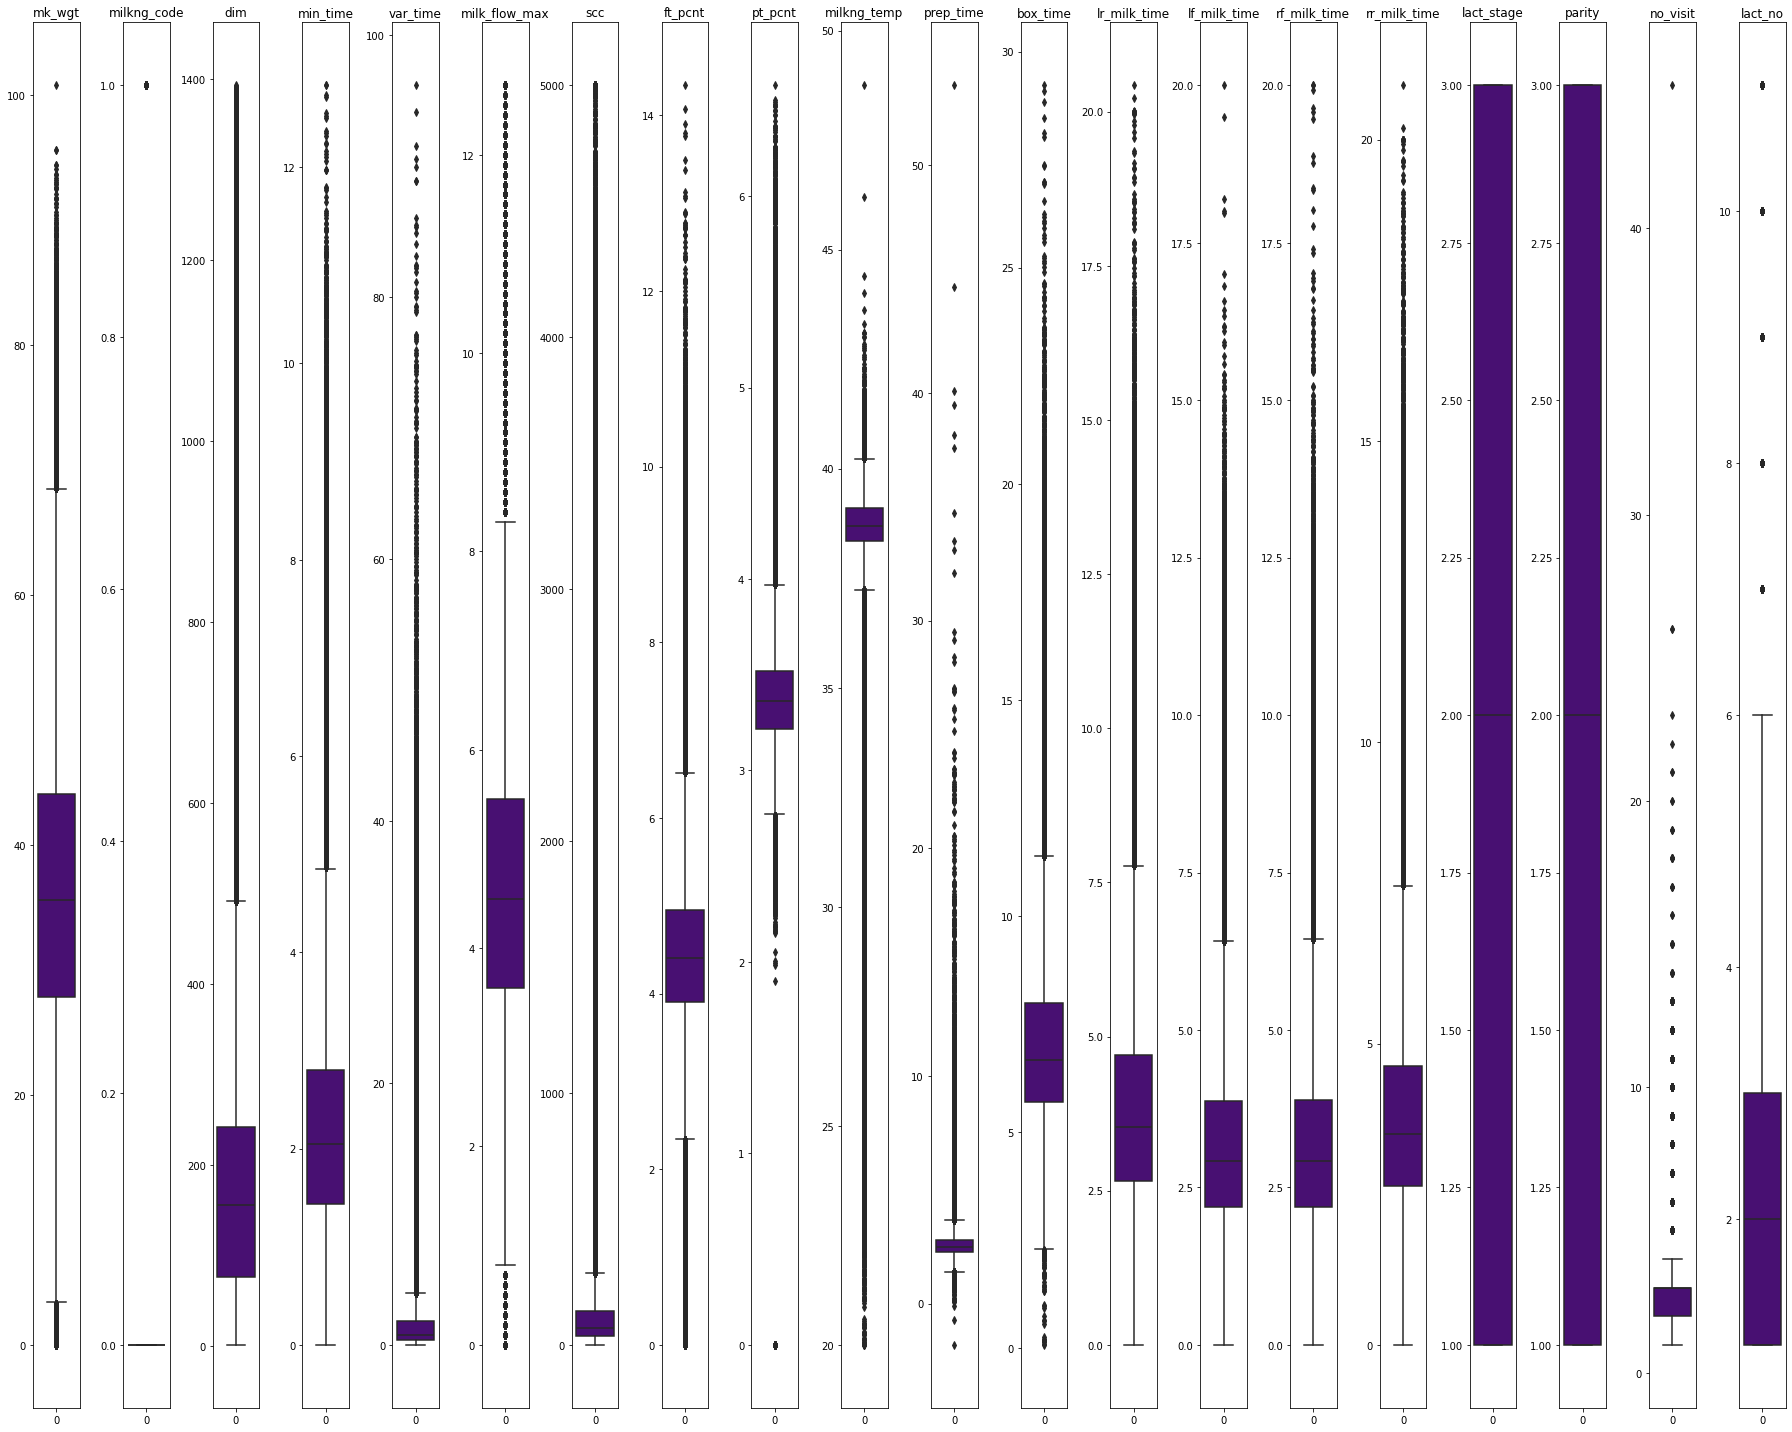

In [28]:
# Store the list of columns
columns_to_plot = [ 'mk_wgt',  'milkng_code', 'dim', 'min_time', 'var_time', 'milk_flow_max', 'scc', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time', 'lact_stage', 'parity', 'no_visit', 'lact_no']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot), figsize=(25, 20))

# Create the boxplot with Seaborn
for idx in range(len(axes)):
        sns.boxplot(data=df[columns_to_plot[idx]], ax=axes[idx], color="indigo") 
        #print(columns_to_plot[idx])
        axes[idx].set_title(columns_to_plot[idx])
        # axis.set(xticklabels=[], xticks=[], ylabel=column)

# Show the plot
plt.tight_layout()
plt.show()


# Exam Extreme Values

In [25]:
print("make change to df_clean if necessary")
df = df_save
df_clean = df

make change to df_clean if necessary


### Milk Weight

In [26]:
max_wgt = 90
print("Inspect milk weight > ", max_wgt)
df_ext = df[df['mk_wgt'] > max_wgt]
print("shape: ", df_ext.shape)
id_ls = df_ext['anm_ida'].where(df_ext['dim']>300).unique().tolist() 
print("find an error record based on dim, id: ", id_ls)
print("average dim, parity: ")
print("dim: ", df_ext['dim'].mean())
print("parity: ", df_ext['parity'].mean())
# df_ext

Inspect milk weight >  90
shape:  (28, 26)
find an error record based on dim, id:  [nan, 1317.0]
average dim, parity: 
dim:  68.21428571428571
parity:  3.0


In [28]:
min_wgt = 3
print("Inspect milk weight > ", max_wgt)
df_ext = df[df['mk_wgt'] < min_wgt]
print("shape: ", df_ext.shape)
id_ls = df_ext['anm_ida'].where(df_ext['dim']>300).unique().tolist() 
# print("find an error record based on dim, id: ", id_ls)
print("average dim, parity: ")
print("dim: ", df_ext['dim'].mean())
print("parity: ", df_ext['parity'].mean())

Inspect milk weight >  90
shape:  (1417, 26)
average dim, parity: 
dim:  219.1531404375441
parity:  2.3450952717007763


### DIM

In [7]:
import math

print("Inspect DIM > 800")
df_dim = df[df['dim'] > 800]
print("shape: ", df_dim.shape)

## get their herd_cow
ls_id = df_dim['herd_cow'].unique().tolist()
#print("herd_cow id: ", ls_id)
print()

## get their current lactation no.
# init ls to store 
ls_no = [] 
# loop
for id in ls_id:
    lact_no = df_dim['lact_no'].where(df_dim['herd_cow']==id).unique().tolist()
    lact_no = [i for i in lact_no if not math.isnan(i)]
    ls_no.append(lact_no[0]) 
#print("lactation number while dim>800: ", ls_no)
print()

## get their all lacatation no. 
ls_no_all = [] 
# loop
for id in ls_id:
    lact_no = df['lact_no'].where(df['herd_cow']==id).unique().tolist()
    lact_no = [i for i in lact_no if not math.isnan(i)]
    ls_no_all.append(lact_no) 
#print("lactation number while dim>800: ", ls_no_all)
print()

print("find cow that have subsequential lactation")
ab_id = []
for i in range(len(ls_no_all)): 
    if len(ls_no_all[i]) > 1: 
        print("cow id: ", ls_id[i])
        print("ls_no: ", ls_no[i])
        print("ls_no_all: ", ls_no_all[i])
        ab_id.append(ls_id[i])
        


Inspect DIM > 800
shape:  (7585, 26)



find cow that have subsequential lactation
cow id:  7122001
ls_no:  2.0
ls_no_all:  [2.0, 3.0]
cow id:  843035
ls_no:  1.0
ls_no_all:  [1.0, 3.0]


In [10]:
df_cow1 = df[df['herd_cow'] == 7122001]
df_cow2 = df[df['herd_cow'] == 843035]

In [13]:
df_cow2[:500]

,herd_cow_date,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no,herd_cow
3136376,843035-2022-01-01 11:25:20,0.0,HO,1.0,788.0,0.000000,0.000000,0.1,NaN,0.000000,0.000000,0.0,843,35,3.616667,102.0,3.616667,0.000000,0.000000,0.000000,0.000000,3.0,1.0,1,1.0,843035
3136377,843035-2022-01-01 11:58:59,11.8,HO,0.0,788.0,2.033333,0.231389,4.9,NaN,3.922330,3.753107,37.9,843,35,2.516667,102.0,5.583333,3.033333,2.033333,2.633333,3.066667,3.0,1.0,1,1.0,843035
3136378,843035-2022-01-01 18:41:37,9.3,HO,0.0,788.0,1.733333,0.029144,4.8,NaN,5.339806,3.889029,38.1,843,35,5.050000,101.0,7.150000,2.100000,1.733333,2.066667,2.050000,3.0,1.0,1,1.0,843035
3136379,843035-2022-01-02 04:47:56,13.7,HO,0.0,789.0,2.050000,0.426366,5.2,NaN,4.864078,3.791942,38.1,843,35,2.916667,102.0,6.550000,3.633333,2.050000,2.816667,3.016667,3.0,1.0,1,1.0,843035
3136380,843035-2022-01-02 12:03:11,0.0,HO,1.0,789.0,0.000000,0.000000,0.1,NaN,0.000000,0.000000,0.0,843,35,4.400000,102.0,4.400000,0.000000,0.000000,0.000000,0.000000,3.0,1.0,1,1.0,843035
3136381,843035-2022-01-02 16:40:53,16.1,HO,0.0,789.0,3.066667,0.428241,4.7,127.0,4.533981,3.859903,38.1,843,35,2.716667,101.0,7.383333,4.666667,3.066667,3.850000,3.783333,3.0,1.0,1,1.0,843035
3136382,843035-2022-01-03 00:13:12,9.4,HO,0.0,790.0,1.783333,0.344537,5.0,NaN,5.592233,3.869612,38.2,843,35,1.983333,101.0,5.083333,3.100000,1.783333,1.983333,2.100000,3.0,1.0,1,1.0,843035
3136383,843035-2022-01-03 10:34:32,14.1,HO,0.0,790.0,2.366667,0.731551,5.0,NaN,4.893204,3.762816,38.0,843,35,1.983333,101.0,6.366667,4.383333,2.366667,2.883333,3.216667,3.0,1.0,1,1.0,843035
3136384,843035-2022-01-03 20:27:30,12.9,HO,0.0,790.0,2.233333,0.229699,5.2,226.0,5.087379,3.791942,38.3,843,35,2.566667,101.0,5.966667,3.400000,2.716667,2.233333,2.833333,3.0,1.0,1,1.0,843035
3136385,843035-2022-01-04 03:53:33,9.6,HO,0.0,791.0,1.700000,0.772778,5.1,NaN,5.009709,3.694854,38.0,843,35,2.200000,101.0,5.833333,3.633333,1.700000,1.950000,2.050000,3.0,1.0,1,1.0,843035


### SCC 

In [37]:
df_scc = df[df['scc']>5000]
print("shape: ", df_scc.shape)
ls_scc_id = df_scc['herd_cow'].unique()
print("inspect cow id with scc>5000: ", len(ls_scc_id), "\n", ls_scc_id)

change = True 
if change: 
    df_clean["scc"] = np.where(df["scc"] > 5000, 5000, df["scc"])

shape:  (87, 26)
inspect cow id with scc>5000:  52 
 [1673032 1790022 1808018 1826032 1896032 1991032 2347011 2589031 2897036
 2968036  322043 3345032 3560005 3605036 3873005 3969031 4122044 4252028
 4372037 4413022 4516031 4578028 4635032 4670015 4763028 4943036 4974034
 5232034 5332031   54018  576028 5997043 6186032 6340044 6380009 6451036
 6491032 6568036 6584032 6623032 6668044  681030 6980000 7388049 7511011
 7604032 7797036   79031 7977014  891032  902036  952030]


### Milk Temperture

In [38]:
print("Exam temperture lower than 20")
df_temp = df[df['milkng_temp'] < 20]
print("weight: ", df_temp['mk_wgt'].mean())
print("shape: ", df_temp.shape)
print("mostly due to milking error where there is a litte milk to measure")

change = True 
if change: 
    mean_temp = df["milkng_temp"].mean()
    df_clean["milkng_temp"] = np.where(df["milkng_temp"] < 20, mean_temp, df["milkng_temp"])

Exam temperture lower than 20
weight:  15.78147410358566
shape:  (2510, 26)
mostly due to milking error where there is a litte milk to measure


### Box time

In [39]:
df_box = df[df['box_time']>=30]
print("shape: ", df_box.shape)
print("prep time: ", df_box['prep_time'].mean())
print("all other variables seems normal, they might got stuck inside the box, or the time record was wrong")

change = True 
if change: 
    mean_temp = df["box_time"].mean() 
    df_clean["box_time"] = np.where(df["box_time"] >= 30, mean_temp, df["box_time"])
    
#df_box

shape:  (23, 26)
prep time:  31.835628019323675
all other variables seems normal, they might got stuck inside the box, or the time record was wrong


### Number of visits

In [40]:
df_visit = df[df['no_visit'] > 6]
print("shape: ", df_visit.shape) 
print("adjust number of visit to vaild visit with milk")

change = True 
if change: 
    mean_temp = df["no_visit"].mean()
    df_clean["no_visit"] = np.where(df["no_visit"] > 6, mean_temp, df["no_visit"])

shape:  (1048, 26)
adjust number of visit to vaild visit with milk


### Correlation Plots

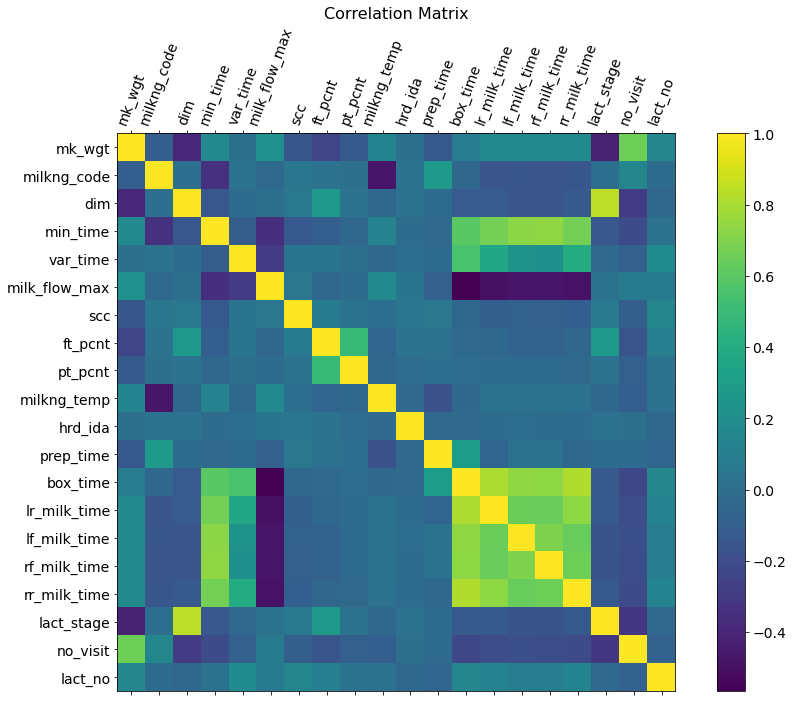

In [44]:

def corr_plot(df_plot, var_ls):
    df = df_plot[var_ls]
    f = plt.figure(figsize=(15, 10))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=70)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)
    
var_ls = ['mk_wgt', 'anb_cd', 'milkng_code', 'dim', 'min_time', 'var_time', 'milk_flow_max', 'scc', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'hrd_ida', 'prep_time', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time', 'lact_stage', 'no_visit', 'lact_no']
"""using func"""
corr_plot(df_clean, var_ls)

### Exam the Min-Max that seems abnormal

In [11]:
print("checking small abnormal values...")
ls_check = ['mk_wgt', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'prep_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']
print("inspect the counts, source herd, source animal...")

for i in range(len(ls_check)):
    check_var = ls_check[i] 
    print("check variable: ", check_var, "<=0")
    df_ab = df_clean[df_clean[check_var]<=0]
    print("count: ", df_ab.shape[0])
    print("number of herd: ", len(df_ab['hrd_ida'].unique()))
    print("number of animal: ", len(df_ab['anm_ida'].unique()))
    #print("\n")

checking small abnormal values...
inspect the counts, source herd, source animal...
check variable:  mk_wgt <=0
count:  223
number of herd:  36
number of animal:  105
check variable:  ft_pcnt <=0
count:  10647
number of herd:  49
number of animal:  1140
check variable:  pt_pcnt <=0
count:  10593
number of herd:  49
number of animal:  1128
check variable:  milkng_temp <=0
count:  0
number of herd:  0
number of animal:  0
check variable:  prep_time <=0
count:  3
number of herd:  2
number of animal:  3
check variable:  lr_milk_time <=0
count:  18504
number of herd:  50
number of animal:  394
check variable:  lf_milk_time <=0
count:  21938
number of herd:  50
number of animal:  498
check variable:  rf_milk_time <=0
count:  23546
number of herd:  50
number of animal:  515
check variable:  rr_milk_time <=0
count:  19650
number of herd:  48
number of animal:  429


### Dealing with milk weight

In [12]:
def clean_milk_weight(df):
    df_wgt = df[df['mk_wgt']==0]
    print("find the animals that haven't been milked for more than 5 days")
    print("shape of the dataset without milk weight: ", df_wgt.shape) 
    print("shape of df: ", df.shape)
    ls_idx_wgt = df_wgt['anm_ida'].tolist() 

    from collections import Counter

    count = Counter(ls_idx_wgt)
    ls_idx_del = count.most_common(10)
    print("animal idx and the counts of missed records: ", ls_idx_del)
    ls_idx_del = [i[0] for i in ls_idx_del if i[1] >= 5]

    try: 
        df = df[~df['anm_ida'].isin(ls_idx_del)]
    except IndexError: 
        pass
    print("shape of df: ", df.shape)
    
    return df

"""using func: """
df_clean = clean_milk_weight(df_clean)

find the animals that haven't been milked for more than 5 days
shape of the dataset without milk weight:  (223, 26)
shape of df:  (1111511, 26)
animal idx and the counts of missed records:  [(2625, 26), (5979, 25), (4143, 11), (6104, 10), (1167, 9), (1314, 9), (3715, 6), (5439, 6), (1528, 4), (2419, 3)]
shape of df:  (1110626, 26)


### Dealing with ft and pt

In [13]:
def clean_ft_pt(df):
    print("interpolate with nearby values")
    # frist make zero to nan, as interpolate method fills nan 
    df['ft_pcnt'].replace(0, np.NaN, inplace=True)
    df['ft_pcnt'] = df.ft_pcnt.interpolate(limit_direction='both')
    df['pt_pcnt'].replace(0, np.NaN, inplace=True)
    df['pt_pcnt'] = df.pt_pcnt.interpolate(limit_direction='both')

    # check 
    ls_check = ['ft_pcnt', 'pt_pcnt']
    for i in range(len(ls_check)):
        check_var = ls_check[i] 
        print("check variable: ", check_var)
        df_ab = df[df[check_var]<=0]
        print("count: ", df_ab.shape[0])
        
    return df 

"""using func: """
df_clean = clean_ft_pt(df_clean)

interpolate with nearby values
check variable:  ft_pcnt
count:  0
check variable:  pt_pcnt
count:  0


In [14]:
def check_max(df):
    print("checking large abnormal values...")
    ls_check = ['mk_wgt', 'ft_pcnt', 'pt_pcnt', 'milkng_temp', 'box_time', 'lr_milk_time', 'lf_milk_time', 'rf_milk_time', 'rr_milk_time']
    ls_max = [80, 12, 8, 50, 30, 30, 30, 30, 30]
    print("inspect the counts, source herd, source animal...")

    for i in range(len(ls_check)):
        check_var = ls_check[i] 
        print("check variable: ", check_var, ">=", ls_max[i])
        df_ab = df[df[check_var] >= ls_max[i]]
        print("count: ", df_ab.shape[0])
        print("number of herd: ", len(df_ab['hrd_ida'].unique()))
        print("number of animal: ", len(df_ab['anm_ida'].unique()))
        
"""using func: """
check_max(df_clean)

checking large abnormal values...
inspect the counts, source herd, source animal...
check variable:  mk_wgt >= 80
count:  555
number of herd:  31
number of animal:  193
check variable:  ft_pcnt >= 12
count:  42
number of herd:  9
number of animal:  34
check variable:  pt_pcnt >= 8
count:  0
number of herd:  0
number of animal:  0
check variable:  milkng_temp >= 50
count:  0
number of herd:  0
number of animal:  0
check variable:  box_time >= 30
count:  0
number of herd:  0
number of animal:  0
check variable:  lr_milk_time >= 30
count:  0
number of herd:  0
number of animal:  0
check variable:  lf_milk_time >= 30
count:  0
number of herd:  0
number of animal:  0
check variable:  rf_milk_time >= 30
count:  0
number of herd:  0
number of animal:  0
check variable:  rr_milk_time >= 30
count:  0
number of herd:  0
number of animal:  0


# Inspect Milking Code

In [16]:
def test_scc_code(df_clean):
    # get a df without nan 
    df_valid = df_clean[df_clean['scc'].notna()]

    # obtain df by milking code
    df_code0 = df_valid[df_valid["milkng_code"]==0]
    df_code1 = df_valid[df_valid["milkng_code"]==1]
    print("compare scc from milking code 0 and 1")
    print("code 0: ", df_code0['scc'].mean(), df_code0['scc'].var())
    print("code 1: ", df_code1['scc'].mean(), df_code1['scc'].var())

    # Import the library
    import scipy.stats as stats

    # Perform the two sample t-test with equal variances
    test = stats.ttest_ind(a = df_code0['scc'], b = df_code1['scc'], equal_var=True)
    print("test result: ", test)
    
"""using func: """
test_scc_code(df_clean)

compare scc from milking code 0 and 1
code 0:  223.69931555276088 241799.13304622218
code 1:  345.7646042170757 489310.125927436
test result:  Ttest_indResult(statistic=-40.50808966456301, pvalue=0.0)


In [17]:
df_code1 = df_clean[df_clean['milkng_code']==1]
print("shape: ", df_code1.shape)
# df_code1[:200]

shape:  (46885, 26)


### Inspect if milking code appears from the robots randomly

In [19]:
df_clean.describe(include=['int64','float64']).apply(lambda s: s.apply('{0:.3f}'.format))

,mk_wgt,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no,herd_cow
count,1110626.000,1110626.000,1110626.000,1110610.000,1110610.000,1110610.000,706411.000,1110626.000,1110626.000,1110548.000,1110626.000,1110626.000,1110610.000,1110626.000,1110626.000,1110610.000,1110610.000,1110610.000,1110610.000,1110626.000,1110626.000,1110626.000,1110626.000,1110626.000
mean,36.179,0.042,168.155,2.151,1.699,4.665,228.698,4.477,3.383,38.614,4018.627,26.027,2.619,102.343,7.076,3.849,3.172,3.171,3.811,2.038,2.071,2.884,2.484,4018653.334
std,12.272,0.201,118.549,1.289,3.028,1.448,502.514,0.897,0.263,1.236,2314.323,15.694,0.662,1.765,1.971,1.809,1.530,1.514,1.808,0.833,0.853,0.897,1.540,2314323.426
min,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.010,1.986,20.000,0.000,0.000,-1.808,101.000,0.083,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,27.000
25%,27.800,0.000,76.000,1.433,0.333,3.600,37.000,3.922,3.219,38.350,2021.000,11.000,2.250,101.000,5.711,2.663,2.183,2.192,2.642,1.000,1.000,2.000,1.000,2021044.000
50%,35.700,0.000,155.000,2.050,0.768,4.500,68.000,4.408,3.374,38.700,4024.000,26.000,2.506,102.000,6.669,3.539,2.917,2.921,3.494,2.000,2.000,3.000,2.000,4024040.000
75%,44.100,0.000,242.000,2.800,1.795,5.500,137.000,4.961,3.520,39.100,6041.000,42.000,2.817,103.000,7.983,4.706,3.875,3.892,4.633,3.000,3.000,3.000,3.000,6041020.000
max,100.800,1.000,1393.000,12.833,96.177,12.700,5000.000,14.340,6.578,48.750,8013.000,50.000,53.500,112.000,29.217,20.000,20.000,20.000,20.900,3.000,3.000,6.000,11.000,8013017.000


In [25]:
print("frist create herd_robot id")
df_clean['herd_robot'] = df_clean['hrd_ida'] * 10000 + df_clean['stall_no']

frist create herd_robot id


In [77]:
def count_continous(df_clean): 
    # assign a subgroup to each set of consecutive rows
    df_clean["subgroup"] = df_clean["milkng_code"].ne(df_clean["milkng_code"].shift()).cumsum()

    # take the max length of any subgroup that belongs to "name"
    def get_max_consecutive(name):
        return df_clean.groupby(["milkng_code", "subgroup"]).apply(len)[name].max()

    # init a list for return 
    ls_count = [] 
    
    for name in df_clean.milkng_code.unique():
        ls_count.append(get_max_consecutive(name))
        
    return ls_count


In [86]:
def split_by_p(df_clean, ls_robot, P=0.01):
    
    # init for result 
    ls_random, ls_cluster = [], []
    print("we find that some robot have code randomly shows up, but some are not")
    for idx in ls_robot:
        #print("test the randomness by maximum appearness: ")
        df_robot = df_clean[df_clean['herd_robot'] == idx]
        ls_code = df_robot['milkng_code']
        #print("shape: ", ls_code.shape) 

        # p is the prob of 1, also the mean of the list
        p = ls_code.mean()
        #print("p: ", p)

        ls_count = count_continous(df_robot)
        #print("ls_count: ", ls_count)

        max_seq = min(ls_count)
        # prop of the occurence of this max sequence 
        prob = (p**(max_seq)) * len(ls_code)
        #print("prob: ", prob)
        # append to result
        if prob < P: 
            ls_cluster.append(idx) 
        else: 
            ls_random.append(idx)
        
    print("length of two groups: ", len(ls_random), len(ls_cluster))
    return ls_random, ls_cluster

In [87]:
ls_random, ls_cluster = split_by_p(df_clean, ls_robot, P=0.01)

we find that some robot have code randomly shows up, but some are not
length of two groups:  29 103


### Check from each robot, the cow id

In [97]:
df_robot = df_clean[df_clean['herd_robot'] == ls_robot[0]]
# get the cow id that has code 1
ls_code_cow = df_robot[df_robot['milkng_code'] == 1]['herd_cow'].tolist()

# check the len of chunk of each cow 
count = 0 
for i in range(len(ls_code_cow)-1): 
    if ls_code_cow[i] == ls_code_cow[i+1]: 
        count += 1 
    else: 
        print("cow id: ", ls_code_cow[i])
        print("count :", count)
        count = 0

cow id:  1000029
count : 11
cow id:  1215029
count : 0
cow id:  1292029
count : 3
cow id:  1638029
count : 20
cow id:  1640029
count : 1
cow id:  1820029
count : 0
cow id:  217029
count : 2
cow id:  2183029
count : 0
cow id:  219029
count : 1
cow id:  2203029
count : 5
cow id:  2279029
count : 5
cow id:  2409029
count : 5
cow id:  2448029
count : 1
cow id:  2646029
count : 3
cow id:  268029
count : 3
cow id:  2693029
count : 5
cow id:  2824029
count : 3
cow id:  2863029
count : 0
cow id:  289029
count : 2
cow id:  292029
count : 2
cow id:  2950029
count : 3
cow id:  298029
count : 1
cow id:  2999029
count : 0
cow id:  3029029
count : 4
cow id:  319029
count : 0
cow id:  3243029
count : 3
cow id:  3290029
count : 0
cow id:  3362029
count : 1
cow id:  3399029
count : 5
cow id:  3411029
count : 3
cow id:  3587029
count : 5
cow id:  3643029
count : 19
cow id:  3654029
count : 3
cow id:  3674029
count : 1
cow id:  371029
count : 6
cow id:  3842029
count : 16
cow id:  3907029
count : 4
cow i

In [99]:
df_cow = df_robot[df_robot['herd_cow'] == 7204029]
df_cow

,herd_cow_date,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no,herd_cow,herd_robot,subgroup
952954,7204029-20220101,33.7,HO,0.0,147.0,3.683333,0.947662,2.8,25.0,4.495146,3.432718,37.900000,7204,29,2.638889,102.0,8.688889,4.500000,4.561111,4.861111,6.050000,2.0,2.0,3.000000,2.0,7204029,290102.0,56865
952955,7204029-20220102,34.6,HO,0.0,148.0,4.083333,0.634329,2.7,46.0,4.097087,3.267670,37.600000,7204,29,2.583333,102.0,8.238889,4.572222,5.100000,5.227778,5.583333,2.0,2.0,3.000000,2.0,7204029,290102.0,56865
952957,7204029-20220104,55.7,HO,0.0,150.0,3.983333,1.025440,2.6,19.0,4.077670,3.296796,37.320000,7204,29,2.730000,102.0,8.680000,4.653333,4.673333,4.993333,5.950000,2.0,2.0,5.000000,2.0,7204029,290102.0,56865
952958,7204029-20220105,44.4,HO,1.0,151.0,0.000000,0.827870,2.6,47.0,4.038835,3.238544,37.600000,7204,29,2.506667,102.0,7.173333,4.076667,4.003333,4.220000,4.606667,2.0,2.0,5.000000,2.0,7204029,290102.0,56866
952959,7204029-20220106,46.9,HO,1.0,152.0,0.000000,0.663218,2.8,50.0,4.252427,3.248252,37.800000,7204,29,2.223333,102.0,6.933333,4.000000,3.793333,4.186667,4.710000,2.0,2.0,5.000000,2.0,7204029,290102.0,56866
952960,7204029-20220107,36.5,HO,0.0,153.0,3.983333,1.819329,2.7,5.0,4.097087,3.355049,37.533333,7204,29,2.555556,102.0,8.516667,5.144444,4.733333,4.994444,5.788889,2.0,2.0,3.000000,2.0,7204029,290102.0,56867
952961,7204029-20220108,44.1,HO,1.0,154.0,0.000000,0.377292,2.8,48.0,4.417476,3.355049,30.060000,7204,29,2.423333,102.0,6.630000,3.666667,3.550000,3.756667,4.206667,2.0,2.0,5.000000,2.0,7204029,290102.0,56868
952962,7204029-20220109,48.0,HO,1.0,155.0,0.000000,0.942037,2.8,47.0,4.213592,3.335631,29.900000,7204,29,2.386667,102.0,7.033333,4.116667,3.453333,4.166667,4.646667,2.0,2.0,5.000000,2.0,7204029,290102.0,56868
952963,7204029-20220110,56.3,HO,0.0,156.0,4.033333,0.793519,2.6,23.0,4.271845,3.374466,37.800000,7204,29,2.840000,102.0,8.560000,4.870000,4.700000,5.113333,5.573333,2.0,2.0,5.000000,2.0,7204029,290102.0,56869
952964,7204029-20220111,45.1,HO,1.0,157.0,0.000000,0.592292,2.6,35.0,4.213592,3.325922,29.660000,7204,29,2.250000,102.0,6.846667,4.070000,3.643333,3.963333,4.496667,2.0,2.0,5.000000,2.0,7204029,290102.0,56870


# Inspect no. visit

cow_id:  [1017020, 1018044, 1019040, 1020024, 102044, 1021028, 1022024, 1023006, 1024000, 1025016, 1026003, 1027004, 1028016, 1029042, 1030012, 103007, 1031039, 1032010, 1033044, 1034042, 1035044, 1036022, 1037023, 1038025, 1039022, 104003, 1040042, 1041044, 1042010, 1043047]


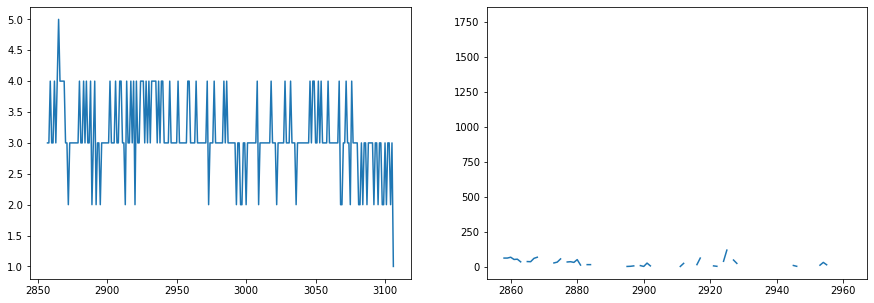

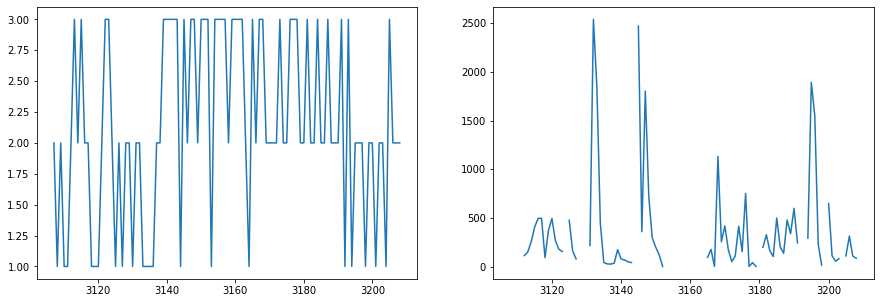

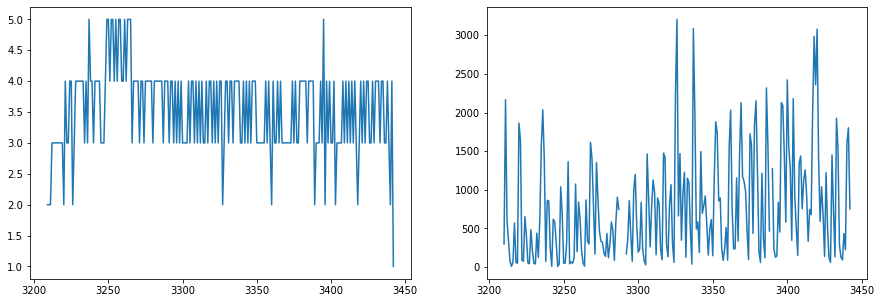

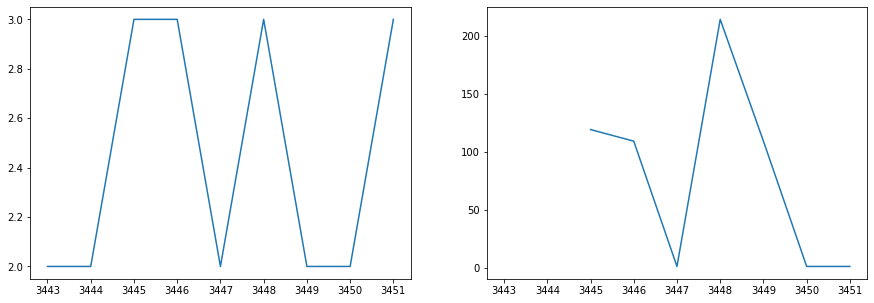

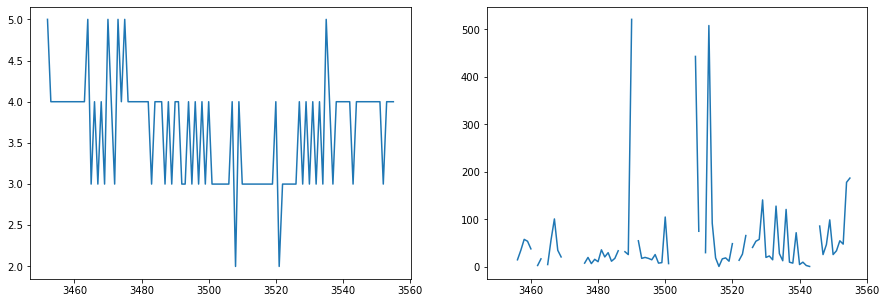

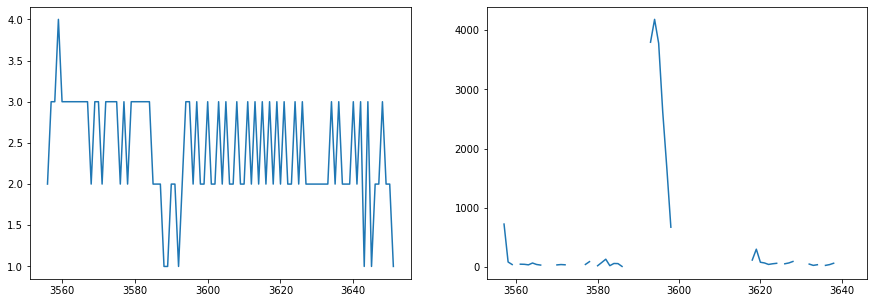

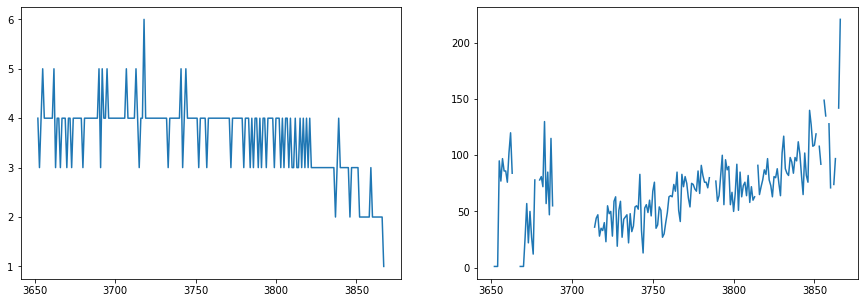

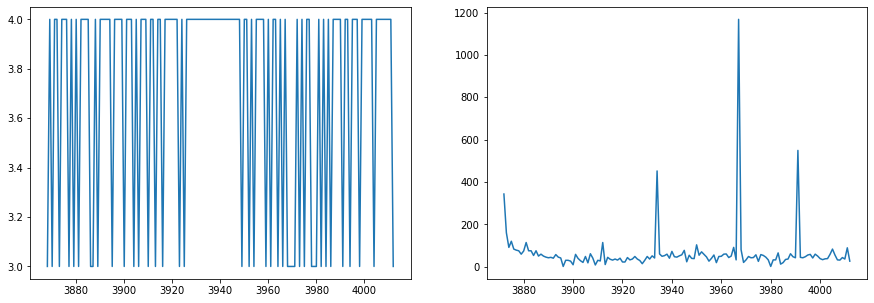

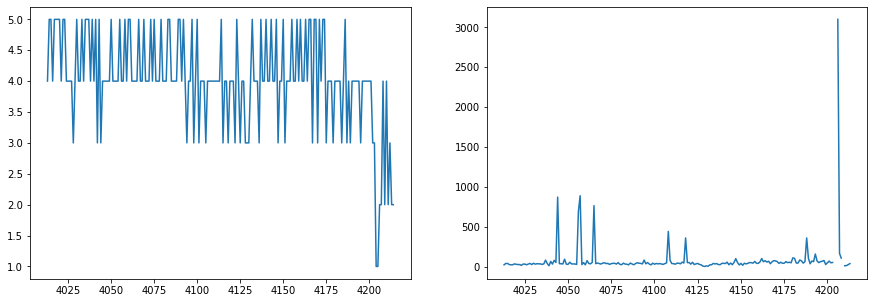

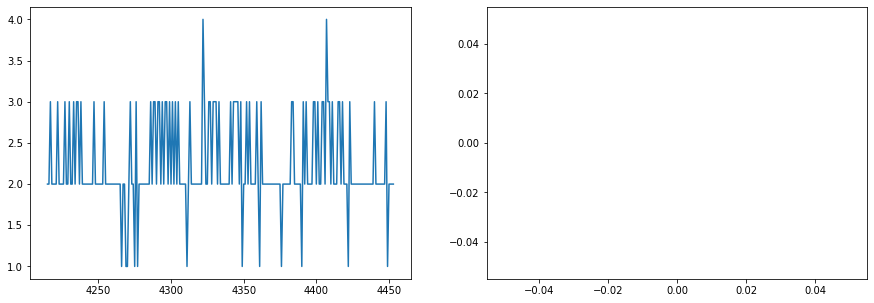

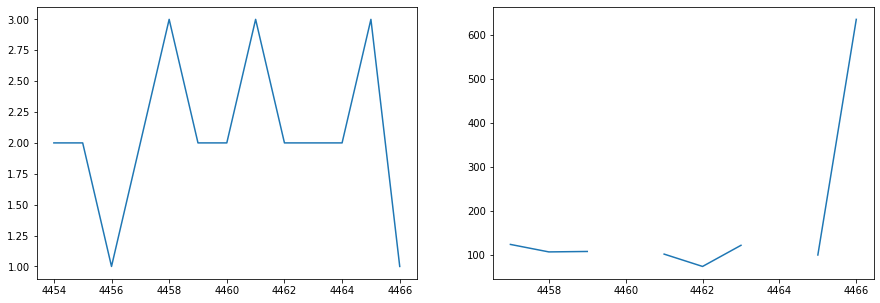

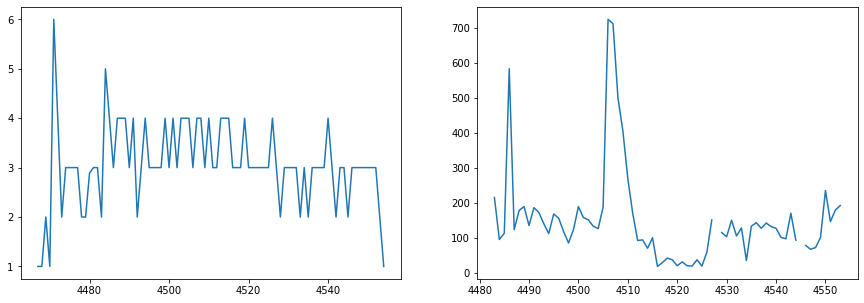

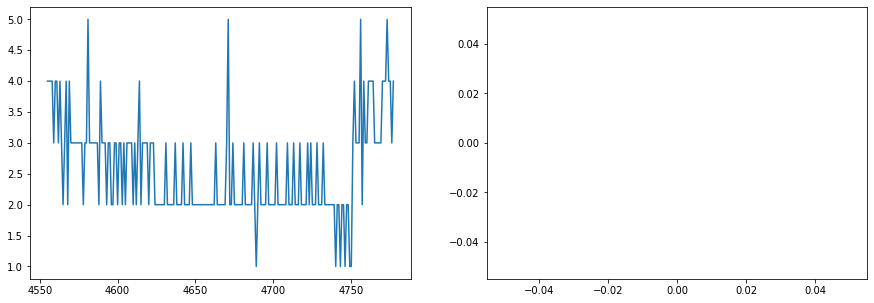

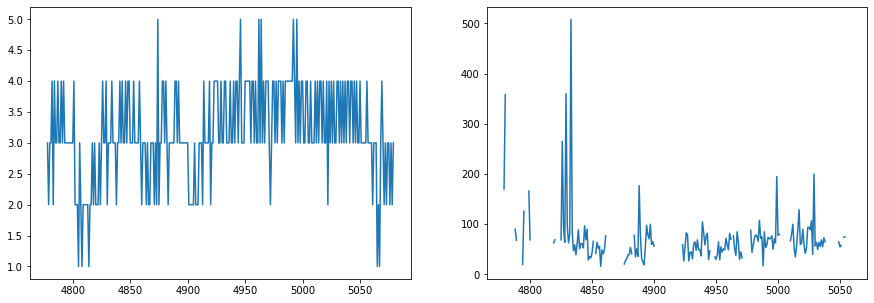

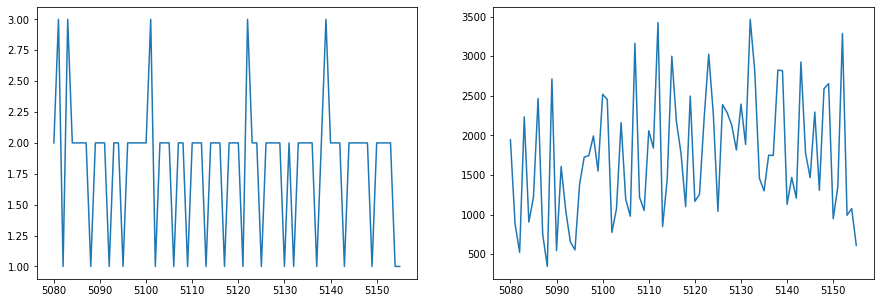

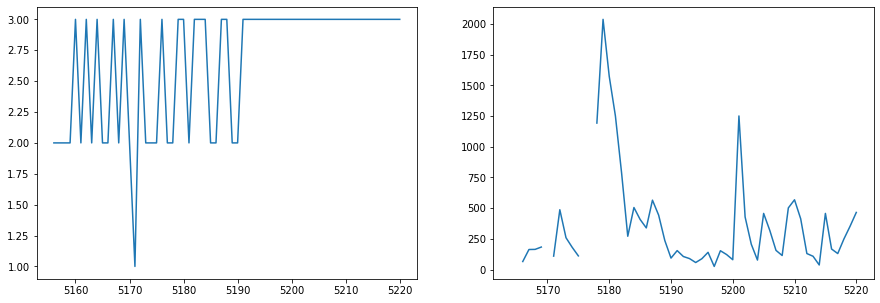

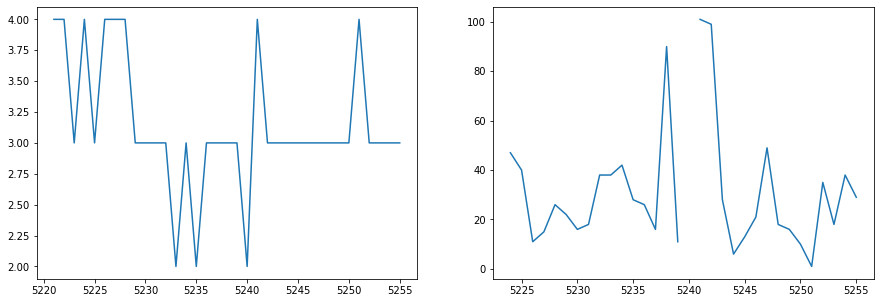

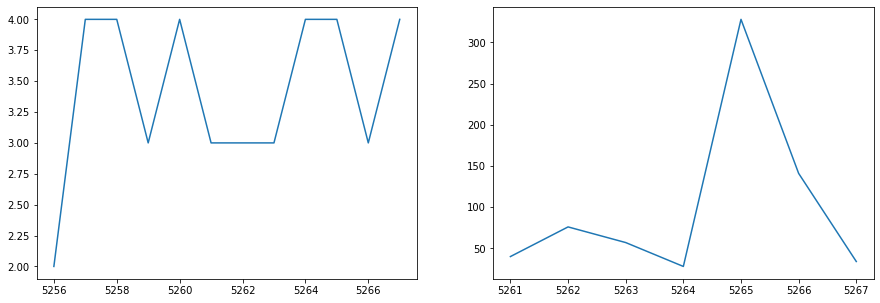

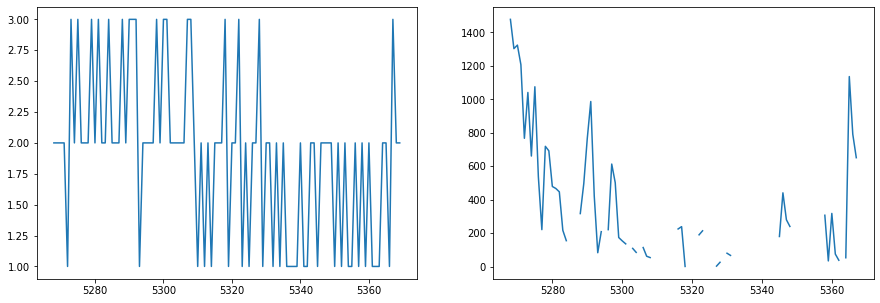

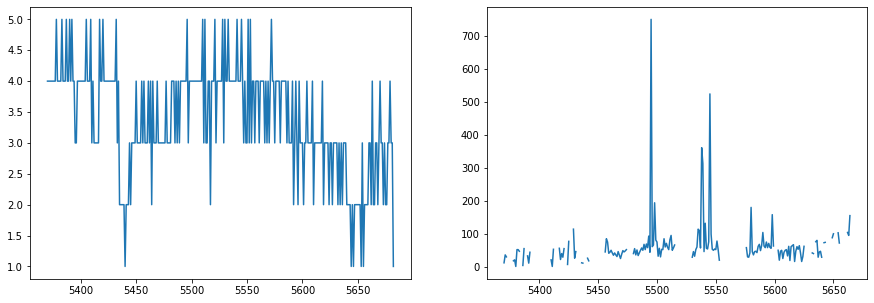

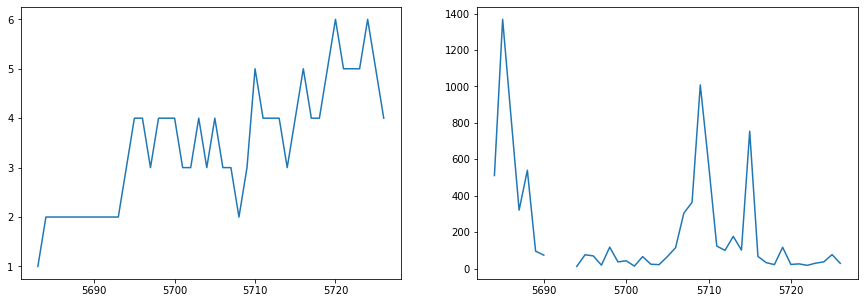

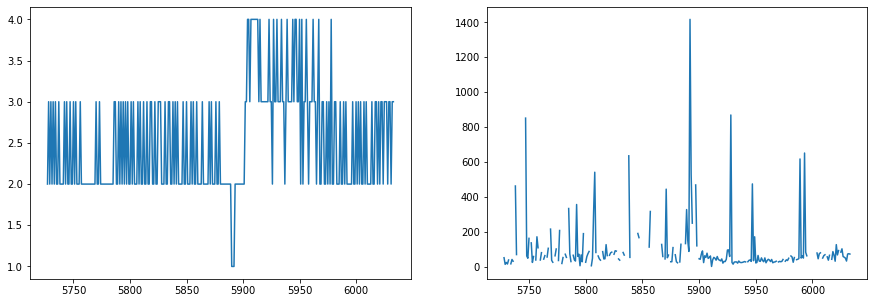

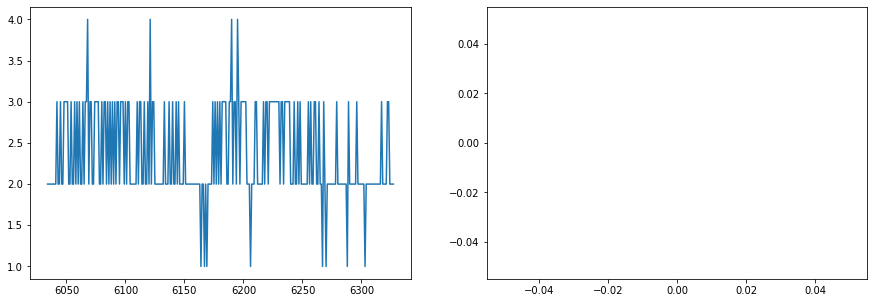

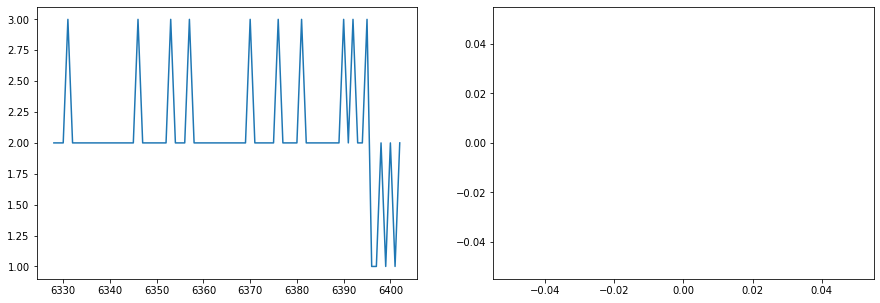

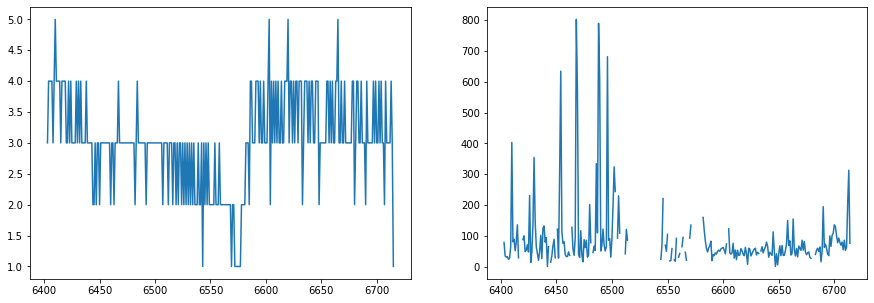

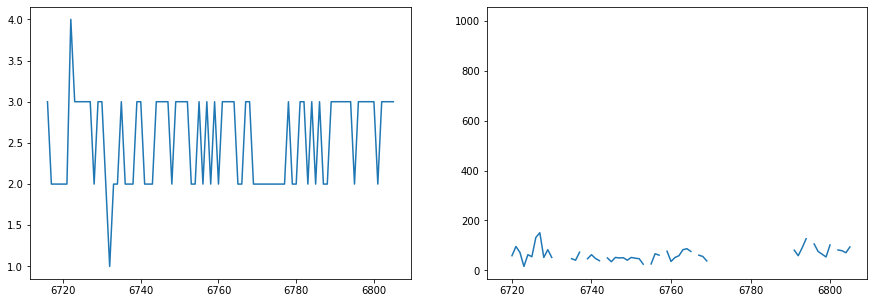

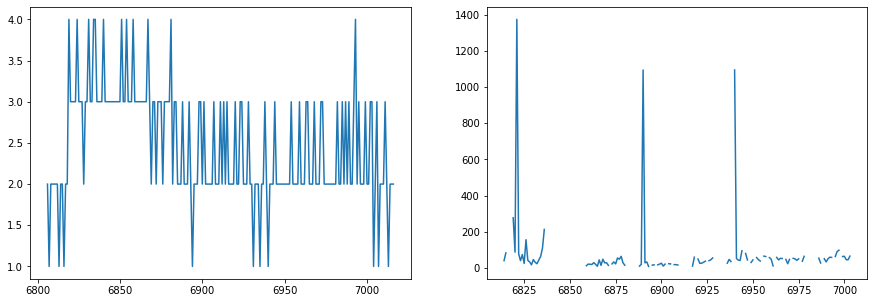

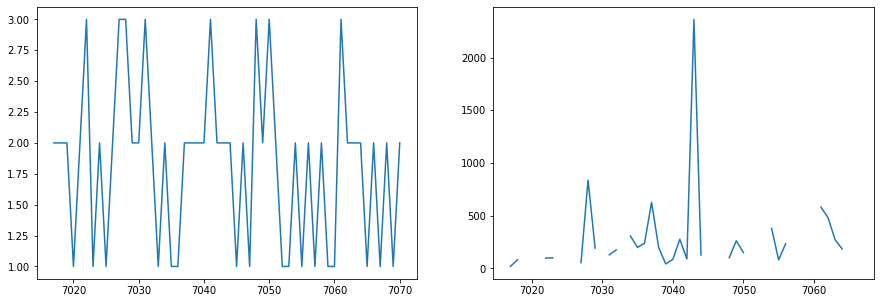

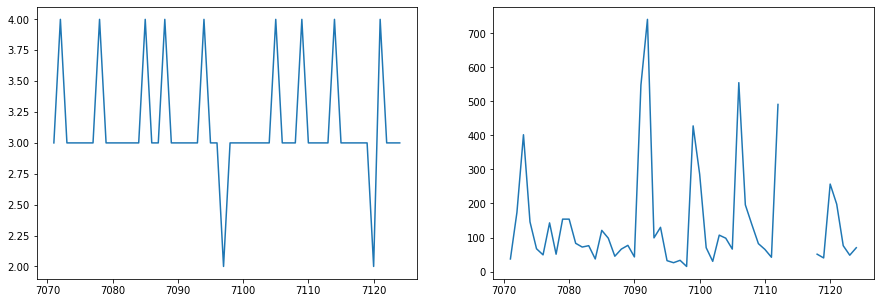

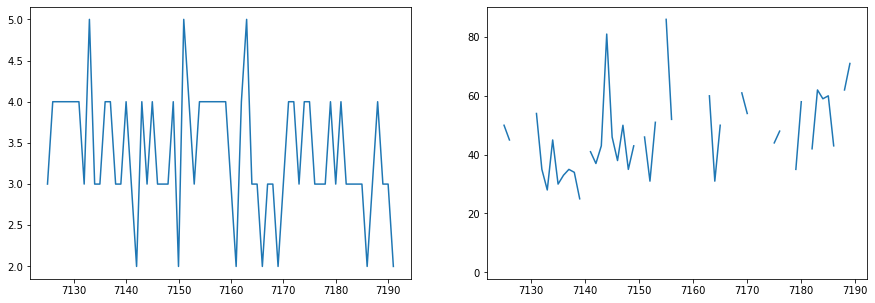

In [146]:
cow_id = df_clean['herd_cow'].unique().tolist()[20:50]
print("cow_id: ", cow_id)

for id in cow_id:
    df_cow = df_clean[df_clean['herd_cow'] == id]

    figure, axis = plt.subplots(1, 2,  figsize=(15, 5)) 
    axis[0].plot(df_cow['no_visit'])
    axis[1].plot(df_cow['scc'])
    plt.show()

# Inspect the Monthly Lactation Curves

In [45]:
df.head()

,herd_cow_date,mk_wgt,anb_cd,milkng_code,dim,min_time,var_time,milk_flow_max,scc,ft_pcnt,pt_pcnt,milkng_temp,anm_ida,hrd_ida,prep_time,stall_no,box_time,lr_milk_time,lf_milk_time,rf_milk_time,rr_milk_time,lact_stage,parity,no_visit,lact_no,herd_cow
0,1000029-20220628,35.1,HO,0.0,46.0,3.316667,2.388981,3.2,NaN,3.766990,3.432718,38.400000,1000,29,2.827778,102.0,9.094444,6.183333,4.377778,3.911111,4.766667,1.0,3.0,3.0,4.0,1000029
1,1000029-20220629,37.4,HO,0.0,47.0,3.616667,0.836296,2.9,NaN,3.708738,3.355049,38.533333,1000,29,3.755556,102.0,9.261111,4.838889,5.216667,4.655556,4.966667,1.0,3.0,3.0,4.0,1000029
2,1000029-20220630,27.8,HO,0.0,48.0,3.850000,0.372037,3.7,NaN,4.058252,3.481262,38.900000,1000,29,2.991667,101.0,8.325000,4.691667,5.025000,4.475000,4.758333,1.0,3.0,2.0,4.0,1000029
3,1000029-20220701,21.3,HO,0.0,49.0,2.850000,0.150000,3.4,NaN,3.533981,3.355049,39.100000,1000,29,4.391667,102.0,8.333333,3.141667,3.625000,3.841667,3.841667,1.0,3.0,2.0,4.0,1000029
4,1000029-20220702,40.1,HO,0.0,50.0,3.483333,0.676181,3.5,NaN,4.067961,3.141456,38.833333,1000,29,3.372222,102.0,8.733333,4.661111,5.272222,4.138889,4.816667,1.0,3.0,3.0,4.0,1000029


In [47]:
""" 
func: 
    plot the lactation curve for p1, p2, and p3 
args: 
    df_plot: panda df 
    total: int (total dim to plot)
    interval: int (dim intervals to plot, 30 days by default)
return: 
    2 plots
"""
def plot_lact_curve(df_plot, total, interval=30):
    
    # define plots
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 15), dpi=200)
    
    # plot for 3 parity
    y_ls, error_ls = [], []
    # get 3 parity 
    df_parity1 = df_plot[df_plot["parity"]==1]
    df_parity2 = df_plot[df_plot["parity"]==2]
    df_parity3 = df_plot[df_plot["parity"]==3]
    # put df into ls
    df_ls = [df_parity1, df_parity2, df_parity3]
    
    # loop 3 parities 
    for p in range(3):
        ## obtain a list ranges
        ls_ranges = [(i, i+30) for i in range(0, total, interval)]
        #print("ls_ranges: ", ls_ranges)
        # get df 
        df_p = df_ls[p]
        y, error = [], [] 
        # loop ranges
        for ranges in range(len(ls_ranges)):
            #print("left, right: ", ls_ranges[ranges][0], ls_ranges[ranges][1])
            left, right = ls_ranges[ranges][0], ls_ranges[ranges][1]
            df_m = df_p["mk_wgt"][(df_p["dim"] >= left) & (df_p["dim"] <= right)]
            # obtain mean, std and append
            #print("mean, std: ", df_m.mean(), df_m.std())
            y.append(df_m.mean())
            error.append(df_m.std())
        # append to y_ls, error_ls
        y_ls.append(y)
        error_ls.append(error)

    #print(y_ls, error_ls)
    ## now plot 
    # get x as the left of all ranges 
    x = [ranges[0] for ranges in ls_ranges]
    # plot 0
    y = y_ls[0]
    error = error_ls[0]
    ax = ax0
    ax.set_title('parity 1')
    y = [round(num, 2) for num in y]
    ax.errorbar(x, y, yerr=error, fmt='-o', color='indigo', ecolor='forestgreen')
    ax.set_xlabel('DIM')
    ax.set_ylabel('Milk Yield /Day')
    for i,j in zip(x, y):
        ax.annotate(str(j),xy=(i,j))
    
    # plot 1
    y = y_ls[1]
    error = error_ls[1]
    ax = ax1
    ax.set_title('parity 2')
    y = [round(num, 2) for num in y]
    ax.errorbar(x, y, yerr=error, fmt='-o', color='indigo', ecolor='forestgreen')
    ax.set_xlabel('DIM')
    ax.set_ylabel('Milk Yield /Day')
    for i,j in zip(x, y):
        ax.annotate(str(j),xy=(i,j))
        
    # plot 2
    y = y_ls[2]
    error = error_ls[2]
    ax = ax2
    ax.set_title('parity 3+')
    y = [round(num, 2) for num in y]
    ax.errorbar(x, y, yerr=error, fmt='-o', color='indigo', ecolor='forestgreen')
    ax.set_xlabel('DIM')
    ax.set_ylabel('Milk Yield /Day')
    for i,j in zip(x, y):
        ax.annotate(str(j),xy=(i,j))
    

In [48]:
total = 420
interval = 30


get an example dataset from a breed to start with
breeds:  ['HO', 'JE', 'AY', 'BS', 'XX', 'CN']
HO:  (1082786, 26)


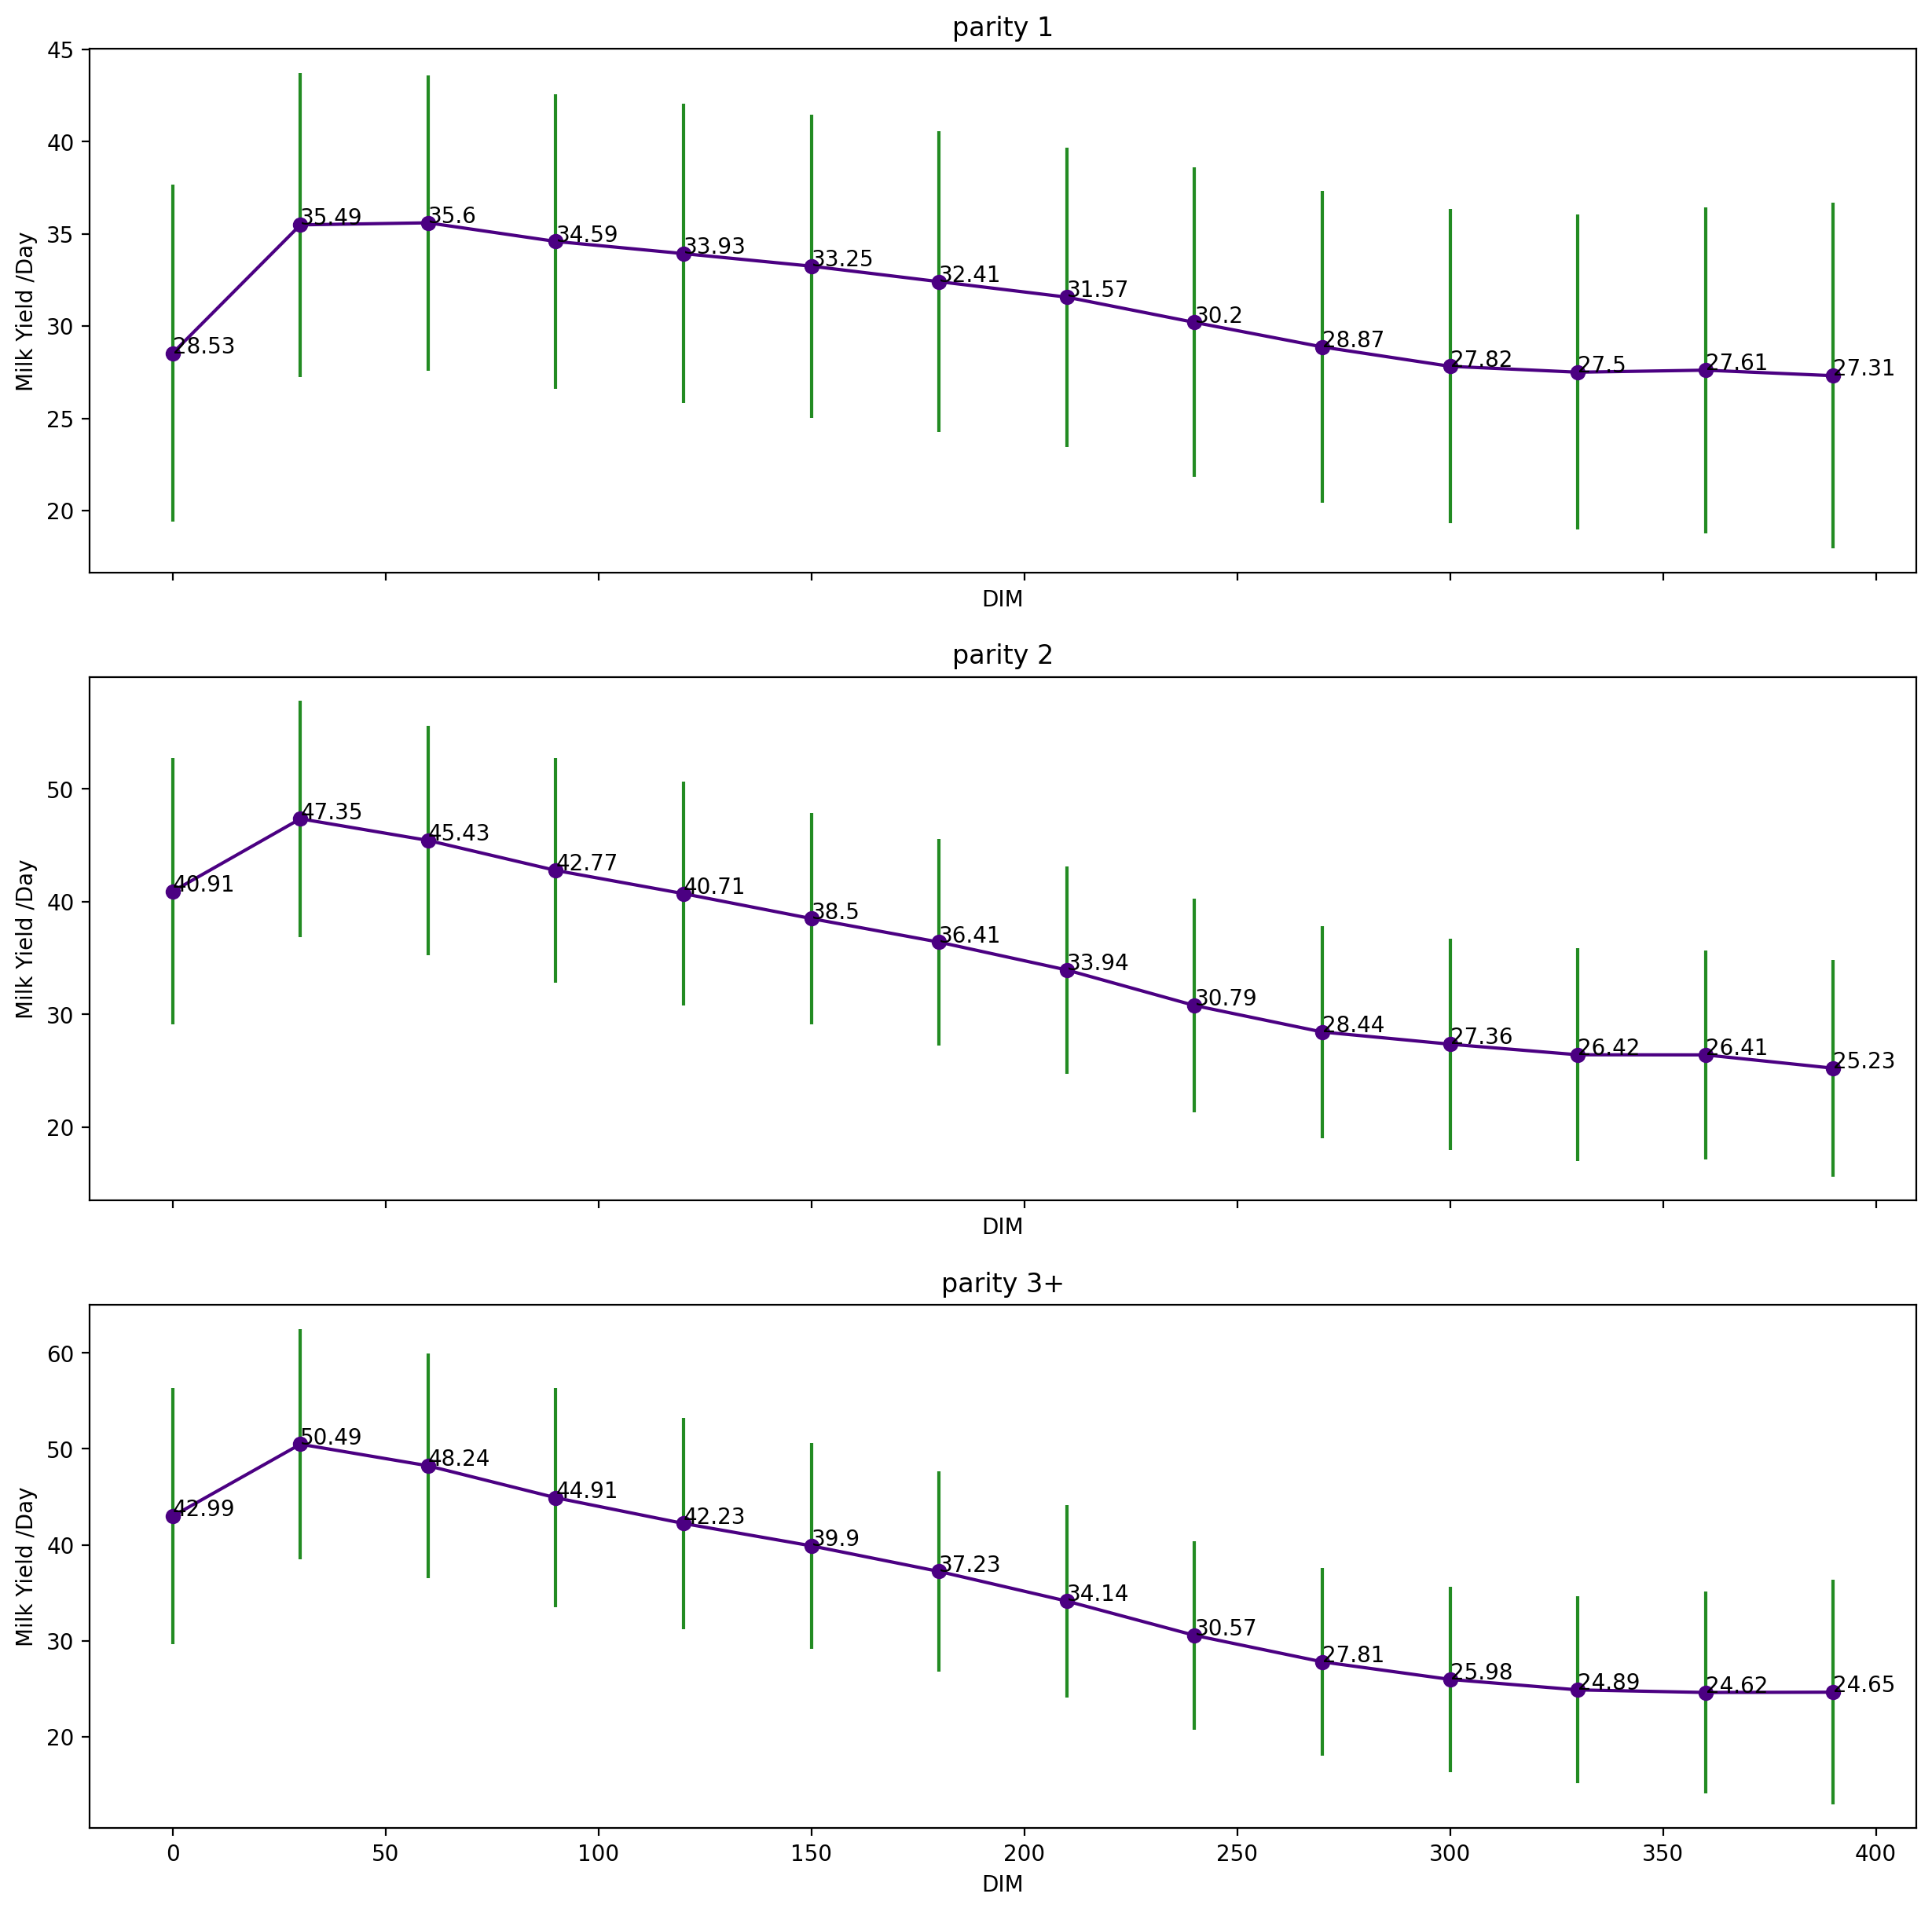

In [49]:
print("get an example dataset from a breed to start with")
print("breeds: ", df['anb_cd'].unique().tolist())
df_ho = df[df['anb_cd']=='HO']
print("HO: ", df_ho.shape)
"""using func"""
plot_lact_curve(df_ho, total, interval=30)

In [78]:
df_ho = df[df['anb_cd']=='HO']
print(df_ho[df_ho['parity']==1].shape)

df_ho = df[df['anb_cd']=='HO']
print(df_ho[df_ho['parity']==2].shape)

df_ho = df[df['anb_cd']=='HO']
print(df_ho[df_ho['parity']==3].shape)


(358614, 26)
(290458, 26)
(432949, 26)


In [82]:
print(len(df_ho['anm_ida'].unique()))
# print(len(df['anm_ida'].unique()))

7707


# Data Preparation

In [65]:
import math


### Partition df_test and df_train

In [62]:
df['herd_cow_idx'] = df['anm_ida']*1000 + df['hrd_ida']
print("number of cows: ", len(df['herd_cow_idx'].unique()))

print("first we look at hosltein... ")
df = df[df['anb_cd'] == 'HO']

# get list of herd_cow id
ls_herd_cow = df['herd_cow_idx'].unique().tolist() 
print("inspect first 10 animals :", ls_herd_cow[:10])

number of cows:  8016
first we look at hosltein: 
inspect first 10 animals : [1000029, 100048, 10012, 1002010, 1003022, 1004015, 1005023, 1006044, 1007007, 1008012]


In [63]:
print("shuffle and take the first 20% as testing, the rest for training")
np.random.shuffle(ls_herd_cow)
print("inspect first 10 animals :", ls_herd_cow[:10])
# set the testing ratio to 0.2 
ratio = 0.2
ls_test_idx = ls_herd_cow[:int(len(ls_herd_cow)*ratio)]
ls_train_idx = ls_herd_cow[int(len(ls_herd_cow)*ratio):]

df_test = df[df['herd_cow_idx'].isin(ls_test_idx)]
print("df_test: ", df_test.shape)
df_train = df[df['herd_cow_idx'].isin(ls_train_idx)]
print("df_train: ", df_train.shape)

shuffle and take the first 20% as testing, the rest for training
inspect first 10 animals : [665019, 996010, 4145044, 5832000, 4764026, 1624013, 4230014, 1468024, 4426013, 7488035]
df_test:  (214722, 26)
df_train:  (867299, 26)


### Create dataset for per DIM periods

In [70]:
## create column: cow_dim_period 

# set the interval and total dim
interval = 30
total =  interval * 15
df['cow_dim_period'] = df['dim'].apply(lambda num: math.ceil(num/interval))


## group by cow_dim_period 

## add dict value from average value

# General Regression

# Transformers

In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [31]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    
    layer = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)
    x = layer(x, x)
 
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    output_length,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    
    """"""
    outputs = layers.Dense(output_length)(x)
    return keras.Model(inputs, outputs)

In [32]:
""" 
func: 
    define model, split train&test, and evaluate
args: 
    ls_X: numpy 3d
    ls_y: numpy 2d
    scc_mean: int
    scc_var: int
    EPOCHS: int
return: 
    y_pred_value, y_test_value: numpy 2d
    SP, SE, AUC: int
"""
def train_and_evaluate_herd(ls_X, ls_y, X_len, y_len, scc_mean, scc_var, len_ls_predictors, EPOCHS):
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    print("Define model...")
    input_shape = ls_X[0].shape
    model = build_model(
        input_shape,
        head_size=64,
        num_heads=2,
        ff_dim=2,
        num_transformer_blocks=2,
        mlp_units=[32],
        output_length = y_len,
        mlp_dropout=0.25,
        dropout=0.25,
    )

    # split into training and testing
    training_ratio = 0.8
    # split and convert to numpy array format (required by tf)
    train_set = (np.array(ls_X[:int(training_ratio*len(ls_X))]), np.array(ls_y[:int(training_ratio*len(ls_y))]))
    test_set = (np.array(ls_X[int(training_ratio*len(ls_X)):]), np.array(ls_y[int(training_ratio*len(ls_y)):]))

    print("Check length of X and y: ", len(ls_X), len(ls_y))
    print("Check length of train and test: ", len(train_set[0]), len(test_set[0]))
    print("training_ratio: ", training_ratio)

    """using func: """
    valid_mae, model, histroy = fit_and_evaluate(model, train_set, test_set, learning_rate=0.02, epochs=EPOCHS)

    print("scc_mean, scc_var: ", scc_mean, scc_var)
    print("Average error: ", scc_mean * valid_mae)

    print("Making prediction...")
    y_pred = model.predict(test_set[0])
    y_pred_value =  (y_pred * scc_var) + scc_mean
    y_test_value = (test_set[1] * scc_var) + scc_mean
    
    # select scc_threshold based on herds
    #threshold_ls = [scc_mean-0.75*scc_var, scc_mean-0.5*scc_var, scc_mean-0.25*scc_var, scc_mean, scc_mean+0.25*scc_var,  scc_mean+0.5*scc_var, scc_mean+0.75*scc_var]
    #threshold_ls = [scc_mean-0.5*scc_var, scc_mean-0.4*scc_var, scc_mean-0.3*scc_var, scc_mean-0.2*scc_var, scc_mean-0.1*scc_var, scc_mean, scc_mean+0.1*scc_var, scc_mean+0.2*scc_var,  scc_mean+0.3*scc_var, scc_mean+0.4*scc_var, scc_mean+0.5*scc_var]
    threshold_ls = [scc_mean]
    performance_ls = [0.1, 0.1, 0.1]
    # set init AUC 
    AUC_max = 0.1 
    # looping for threshold 
    for i in threshold_ls:    
        """using func: regress_to_classify"""
        SP, SE, AUC = regress_to_classify(y_test_value, y_pred_value, scc_threshold=i)
        print("SP, SE, AUC: ", SP, SE, AUC)
        # pick by AUC
        if AUC >= AUC_max:
            # append to performance
            performance_ls = [SP, SE, AUC]
            # reset AUC_max 
            AUC_max = AUC
    
    # end looping 
    print()
    print("Final SP, SE, AUC: ", performance_ls)
    
    return y_pred_value, y_test_value, SP, SE, AUC

In [33]:
# extra code – defines a utility function we'll reuse several time
"""
func: 
    fit_and_evaluate
args: 
    model: tf model
    train_set: tuple(X_train, y_train)
    valid_set: tuple(X_test, y_test)
    learning_rate: float
    epochs: int 
"""
def fit_and_evaluate(model, train_set, valid_set, learning_rate, epochs=10):
    
    # set the early stopping 
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_mae", patience=5, restore_best_weights=True)
    
    # set optimizers
    opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    
    # compile the model
    model.compile(loss=tf.keras.losses.Huber(), optimizer=opt, metrics=["mae"])
    
    # fitting the model 
    history = model.fit(
                    x = train_set[0], 
                    y = train_set[1],
                    batch_size=128,
                    validation_data=(valid_set[0], valid_set[1]), 
                    epochs=epochs,
                    callbacks=[early_stopping_cb])
    
    # compute the validation loss
    valid_loss, valid_mae = model.evaluate(valid_set[0], valid_set[1])
    
    return valid_mae, model, history

# Plotting

In [38]:
""" 
func: 
    to write the label on plots 
args: 
    dates, temp: list of x and y in the plot 
    plt: the plot object
return: 
    annotated plot
"""
import matplotlib.pyplot as plt
import numpy as np
def write_label(dates, temp, plt): 
    for x, y in zip(dates, temp):
        label = y
        plt.annotate(label, (x, y),
                     xycoords="data",
                     textcoords="offset points",
                     xytext=(0, 10), ha="center")

""" 
func: 
    to plot for a model's result 
args: 
    log_ls: list[list[float]] the results of this model
    model_name: str
    path: str
return: 
    name_ls: list[str]
"""
def plot_one_model(log_ls, model_name, path):

    # init methods
    method_str = ['_input_21_days', '_input_28_days', '_input_35_days']
    # init method id (0, 1, 2)
    idx_method_ls = [0, 1, 2]
    # total num of methods
    shrink_method = 3 
    # init name 
    name_ls = []

    # looping for idx_method 
    for idx_method in idx_method_ls: 

        # init list for SP, SE, AUC 
        SP, SE, AUC = [], [], [] 

        # loop the list 
        for i in range(idx_method, len(log_ls), shrink_method):
            # specificity
            sp = round(log_ls[i][0]*100, 2)
            SP.append(sp)
            # sensitifity
            se = round(log_ls[i][1]*100, 2)
            SE.append(se)
            # auc
            auc = round(log_ls[i][2]*100, 2)
            AUC.append(auc)   

        # reserse the list
        SP, SE, AUC = SP[::-1], SE[::-1], AUC[::-1]
        x_axis = ['5 days', '3 days', '1 days']

        plt.plot(x_axis, SP, label = 'specificity', color="indigo", marker = 'o')
        """using func: """
        write_label(x_axis, SP, plt)
        plt.plot(x_axis, SE, label = 'sensitivity', color="indigo", marker = 's')
        """using func: """
        write_label(x_axis, SE, plt)
        plt.plot(x_axis, AUC, label = 'AUC', color="forestgreen", marker = '^')
        """using func: """
        write_label(x_axis, AUC, plt)
        plt.legend() 
        plt.title(model_name + " with method: " + method_str[idx_method])
        plt.xlabel("Days before mastitis")
        
        # saving 
        name = model_name + "_" + method_str[idx_method]
        name_ls.append(name)
        plt.savefig(path+name, dpi=200)
        plt.close()
        
    return name_ls


In [40]:
""" 
func: 
    concate plots 
args: 
    name_ls_log, name_ls_tree, name_ls_mlp: list[str]
return: 
    a plot
"""
def concat_plots(name_ls, path, name):
    
    temp = name_ls
    figa = plt.imread(path + temp[0] + '.png')
    figb = plt.imread(path + temp[1] + '.png')
    figc = plt.imread(path + temp[2] + '.png')
    figd = np.concatenate((figa,figb), axis=0)
    fige = np.concatenate((figd,figc), axis=0) 
                   
    fname = path + name + ".png"
    plt.imsave(fname, fige)